<a href="https://colab.research.google.com/github/aman-makode-11/MLPractice/blob/main/BonusAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Aman Makode                                                      
Roll No. : 34  (3rd year/6th Sem)  
Subject : Machine Learning Lab  
Reg No. : 22070221

# **Bonus Assignment: 7**

**`Problem defination: `**

Students will implement the Random Forest algorithm, an ensemble method based on Bagging, to enhance classification performance on a healthcare dataset. You will use the Heart Disease UCI Dataset to predict the presence or absence of heart disease in patients. The dataset contains 303 records and 14 attributes, such as age, sex, cholesterol levels, blood pressure, and ECG results. You are required to build a Random Forest model, tune its parameters, and evaluate its performance. Discuss the importance of feature selection in Random Forests and how the model handles overfitting compared to individual decision trees.

**output** :

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


In [9]:
df = pd.read_csv("heart.csv")

# Convert categorical columns to numeric
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [10]:
# Step 3: Data Preprocessing
# Convert categorical columns to numeric
df['sex'] = df['sex'].astype(int)
df['cp'] = df['cp'].astype(int)
df['fbs'] = df['fbs'].astype(int)
df['restecg'] = df['restecg'].astype(int)
df['exang'] = df['exang'].astype(int)
df['slope'] = df['slope'].astype(int)
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

# Split data into features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (820, 13), Testing Set: (205, 13)


In [11]:
# Step 4: Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:
 [[100   0]
 [  0 105]]


In [17]:
# Step 5: Hyperparameter Tuning


# Define hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for efficient hyperparameter tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1  # Show progress
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters
print("\nBest Hyperparameters:", random_search.best_params_)

# Train the best model using the optimal hyperparameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions with the best model
y_pred_best = best_rf.predict(X_test)

# Evaluate performance of the tuned model
print("\nTuned Model Performance:")
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned Classification Report:\n", classification_report(y_test, y_pred_best))



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Tuned Model Performance:
Tuned Accuracy: 1.0

Tuned Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



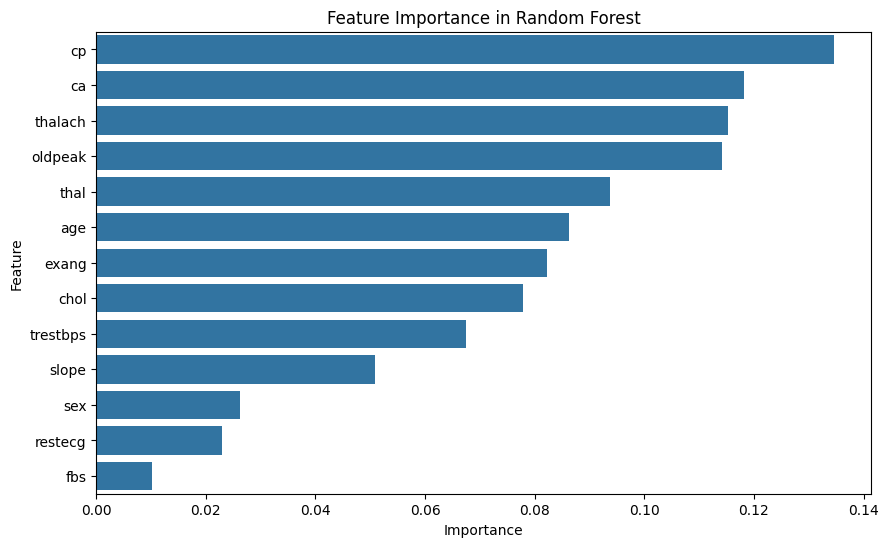

In [18]:
# Step 6: Feature Importance Analysis

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances['Feature'])
plt.title("Feature Importance in Random Forest")
plt.show()